In [52]:
import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time

# Projeto 1 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: 
## Matrícula: 

# Questão 1

## Questão 1a (0.5 pontos)

O objetivo deste exercício é estudar a decimação e a interpolação de sinais. 
Escreva uma função em python que receba um sinal x[n] e retorne um sinal y[n] que seja a decimação por um fator de 2 do sinal de entrada x[n]. 

Em seguida, use a sua função para encontrar o sinal decimado para a entrada: 

$$ x = \left[1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0 \right]$$

In [53]:
def decimacao(sinal):
    sinal_decimado =[]
    for i in range(len(sinal)):
        if i % 2 == 0:
            sinal_decimado.append(sinal[i])
    return sinal_decimado

x = [1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0,1,2,1,0]
y = decimacao(x)
print(f'sinal: {x}')
print(f'sinal decimado: {y}')

sinal: [1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0]
sinal decimado: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Questão 1b (0.5 pontos)

Escreva uma função em python que receba um sinal y[n] e retorne um sinal z[n] que seja a interpolação por um fator de 2 do sinal de entrada y[n]. A sua função deve aumentar o número de amostras e assinalar um novo valor para as amostras criadas. Você pode escolher se as amostras interpoladas terão o valor médio das amostras ou o valor da amostra anterior. 

Em seguida, utilize a sua função para encontrar o sinal interpolado para o sinal y[n] da questão anterior (1a).


In [54]:
def interpolacao(sinal):
    sinal_interpolado =[]
    for i in range(len(sinal) - 1):
        sinal_interpolado.append(sinal[i])
        sinal_interpolado.append((sinal[i] + sinal[i+1]) / 2)
    sinal_interpolado.append(sinal[-1])
    sinal_interpolado.append(sinal[-1] + 0 / 2)
    return sinal_interpolado

z = interpolacao(y)
print(f'sinal: {y}')
print(f'sinal interpolado: {z}')

sinal: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
sinal interpolado: [1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0, 1, 1.0]


## Questão 1c (1 ponto)

Uma imagem é um sinal discreto de duas dimensões. 
Escrevemos I(x,y) para representar esta imagem como uma matriz bidimensional de dimensões (w x h), onde w é a largura da imagem e h a sua altura.

Para imagens, fazemos a decimação e a interpolação separadamente, para todas as linhas e, em seguida, para todas as colunas (ou vice-versa), considerando que cada linha ou coluna é um sinal de uma dimensão.

Aplique o seu algoritmo de decimação sucessivamente até obter uma imagem com tamanho (w/16 x h/16), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante.

Imagem original de tamanho: 512 x 512


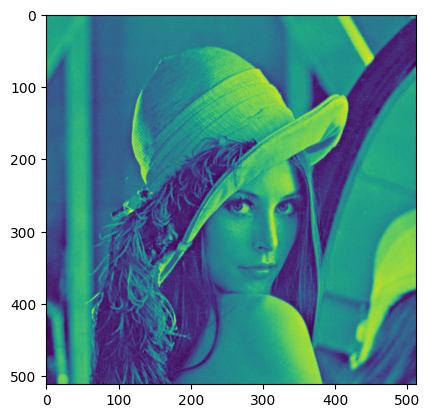

Imagem decimada de tamanho: 16 x 16


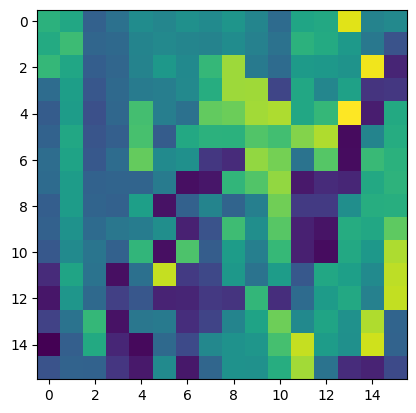

In [55]:
def ate16(tamanho_original):
    return int(math.log2(tamanho_original) - math.log2(16))

im = Image.open("lena.bmp")
imagem = np.array(im)
h, w = imagem.shape
print(f'Imagem original de tamanho: {h} x {w}')
plt.imshow(im)
plt.show()

for i in range(ate16(h)):
    imagem = decimacao(imagem)
    imagem = np.transpose(imagem)
    imagem = decimacao(imagem)
    imagem = np.transpose(imagem)

imagem_decimada = Image.fromarray(imagem.astype('uint8'))
im_decimada = np.array(imagem)
hp, wp = im_decimada.shape
print(f'Imagem decimada de tamanho: {hp} x {wp}')
plt.imshow(imagem_decimada)
plt.show()

## Questão 1d (1 ponto)

Utilizando como entrada a imagem decimada (de tamanho w/16 x h/16) da questão anterior (1c), aplique o seu algoritmo de interpolação sucessivamente até obter uma imagem com tamanho (w x h), isto é, aplique o algoritmo 4 vezes seguidas, mostrando a imagem resultante. Compare a imagem original com a imagem que foi decimada/interpolada. 

Imagem original de tamanho: 512 x 512


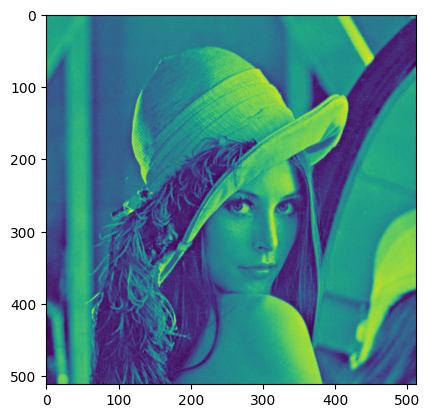

Imagem decimada de tamanho: 16 x 16


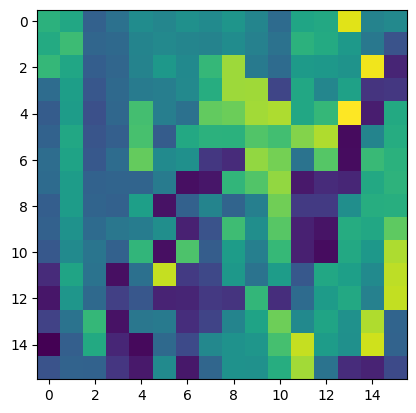

Imagem interpolada de tamanho: 512 x 512


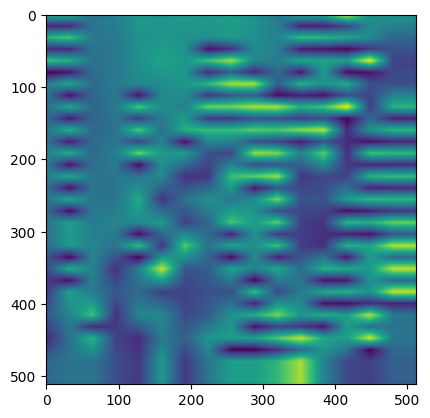

In [56]:
def ate512(tamanho_original):
    return int(math.log2(512) - math.log2(tamanho_original))

print(f'Imagem original de tamanho: {h} x {w}')
plt.imshow(im)
plt.show()
print(f'Imagem decimada de tamanho: {hp} x {wp}')
plt.imshow(imagem_decimada)
plt.show()

for i in range(ate512(hp)):
    imagem = interpolacao(imagem)
    imagem = np.transpose(imagem)
    imagem = interpolacao(imagem)
    imagem = np.transpose(imagem)

imagem_interpolada = Image.fromarray(imagem.astype('uint8'))
im_interpolada = np.array(imagem)
hp, wp = im_interpolada.shape
print(f'Imagem interpolada de tamanho: {hp} x {wp}')
plt.imshow(imagem_interpolada)
plt.show()

# Questão 2

Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] + \frac{1}{6}y\left[n\right] = x\left[n+2\right] + 2x\left[n+1\right]+x\left[n\right] $$
$$ x\left[n\right] = \left(\frac{1}{4}\right)^n u\left[n\right] $$
$$ y\left[-1\right] = y\left[-2\right] = 0 $$

## Questão 2a (1 ponto)

Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [57]:
# dado o sinal:
# y[n + 2] + (1/6)y[n] = x[n + 2] + 2x[n + 1] + x[n]
# =>
# (E^2 + 1/6)y[n] = (E^2 + 2E + 1)x[n]
# O polinômio característico é: (γ^2 + 1/6)
# Gerando as raízes complexas características +-j/sqrt(6)
# Calculando o módulo: sqrt(0^2 + 1/sqrt(6)^2) = 1/sqrt(6)
# Calculando o ângulo: como a parte real é 0 será arctg(∞) = +-π/2
# =>
#           /     1    \  ^n      / π      \
# y0[n] = c|   -------  |     cos| ---n + θ |
#           \  sqrt(6) /          \ 2      /
#
# Para descobrir c e θ:
#
#                             / -π     \
# y0[-1] = 0 = c(sqrt(6)) cos|  --- + θ |
#                             \  2     /
#
#
#
# y0[-2] = 0 = c(6) cos(-π + θ)
#
#     / -π     \                                                             / -π     \
# cos|  --- + θ | e/ou cos(-π + θ) será diferente de 0, uma vez que para cos|  --- + θ | ser 0
#     \  2     /                                                             \  2     /
# θ tem de ser um multiplo inteiro de π, porém para todo θ = um multiplo inteiro de 2π, cos(-π + θ) = 1
#
# Portanto, para que ambas equações sejam iguais a 0, c deve ser igual a 0
# =>
# h[n] = A0δ[n] + 0u[n]
# 
# Para determinar A0 é necessário encontrar an e bn
# an = 1/6 e bn = 1
# Logo A0 = 1/(1/6) = 6
#
#                                                                   Portanto h[n] = 6δ[n]



## Questão 2b (1 ponto)
Escreva um código para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida iterativamente com a resposta analítica para as primeiras 100 amostras, plotando o gráfico das duas respostas.

Calcule também o erro médio quadrático entre os dois sinais, h[n] analítico e g[n] iterativo, através da equação:

$$ MSE = \frac{1}{N} \sum_{i=0}^{N-1} \left( h\left[i\right] - g\left[i\right] \right)^2 $$

onde N é o número de amostras considerado (no caso, 100 amostras).

Gráfico de h[n]


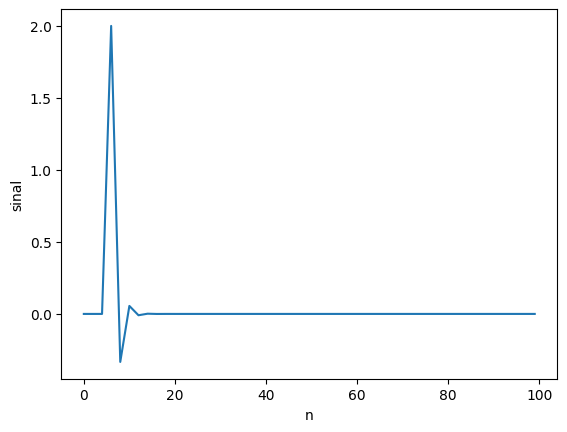

Gráfico de g[n]


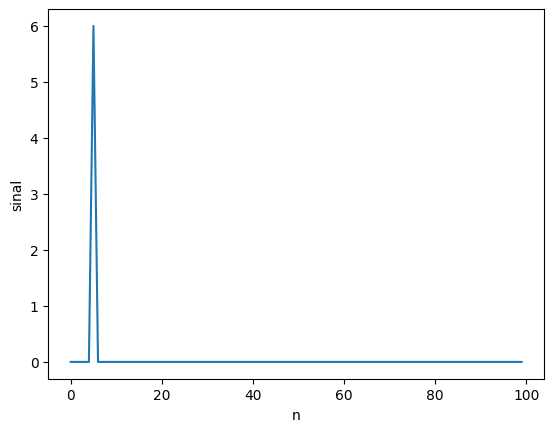

Gráfico de teste


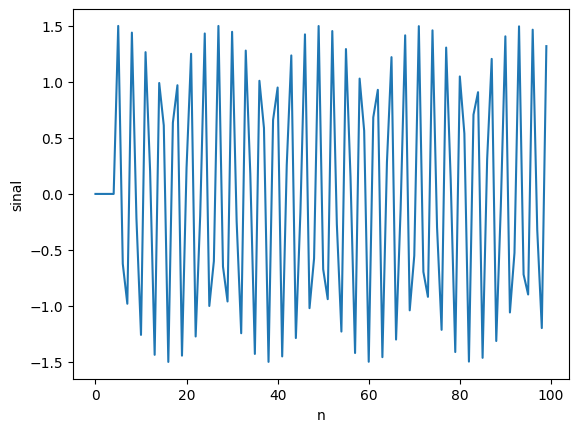

Erro médio quadradico: 0.2982857142857142


In [58]:
def impulso(imp):
    if imp == 0:
        return 1
    else:
        return 0

def sinal(n):
    if n <= -1:
        return 0
    else:
        resultado = impulso(n) + 2*impulso(n-1) + impulso(n-2) - (sinal(n-2)/6)
        return resultado

def sinalg(n):
    if n == 0:
        return 6
    else:
        return 0

def erro(sinal1, sinal2):
    MSE = 0
    for i in range(len(sinal1)):
        MSE += (sinal1[i] - sinal2[i])**2
    return MSE/len(sinal1)

def teste(n):
    if n < 0:
        return 0
    else:
        return (3/4)*(cmath.exp(-2j*n)+cmath.exp(2j*n))

hn = []
gn = []
tes = []
for i in range(-5, 95):
    hn.append(sinal(i))
    gn.append(sinalg(i))
    tes.append(teste(i))



print("Gráfico de h[n]")
plt.plot(hn)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print("Gráfico de g[n]")
plt.plot(gn)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print("Gráfico de teste")
plt.plot(tes)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

print(f"Erro médio quadradico: {erro(hn,gn)}")




## Questão 2c (1 ponto)

Determine a resposta do sistema às condições iniciais dadas analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [59]:
# Dado que a resposta ao sitema a estas condições pode ser determinada pela convolução do sinal (0.25)^n u[n0] com a resposta ao impulso h[n] = 6δ[n]
# Devemos então procurar o par na Tabela 3.1 Somatório de convolução
# Encontramos a resposta na linha 1
# Pela propriedade linear da convolução o 6 que multiplica  o impulso em h[n] multiplicará a resposta final, logo:
# y[n] = h[n] conv x[n] = 6(0.25)^n u[n]

### Questão 2d (1 ponto)
Escreva um programa para obter a resposta do sistema através da convolução da entrada com a resposta ao impulso h[n] truncada para as primeiras 20 amostras (isto é, considerando apenas as primeiras 20 amostras de h[n]).

Compare a resposta obtida pela convolução com a resposta obtida analiticamente, plotando o gráfico das duas respostas (calcule as primeiras 100 amostras do sinal). Calcule também o erro médio quadrático entre os dois sinais.

Convolução de h[n] e x[n] obtida por função


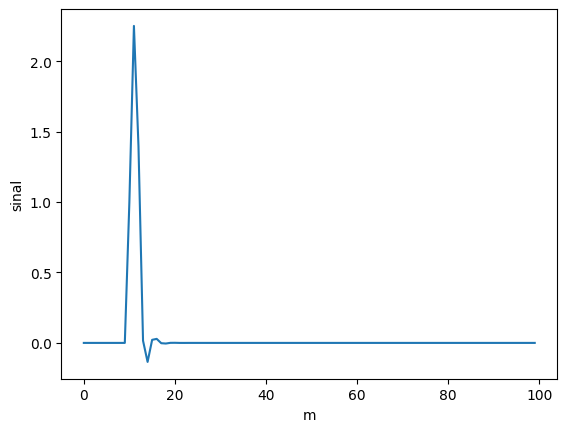

Convolução de h[n] e x[n] obtida analiticamente


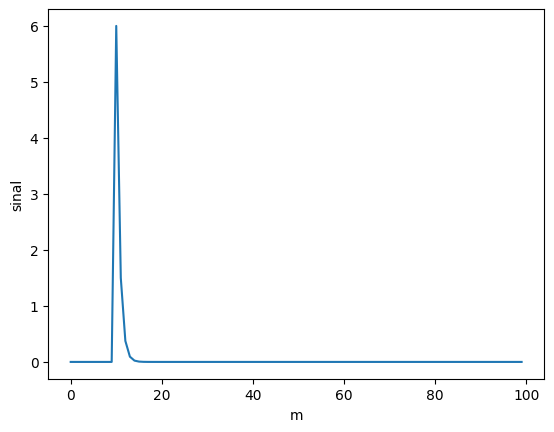

Erro médio quadradico: 0.2663681885126439


In [60]:
def entrada(n):
    if n < 0:
        return 0
    else:
        return (0.25**n)

def convolucao(x, h):
    M = len(x)
    N = len(h)
    y = [0] * (M + N - 1)
    
    for n in range(M + N - 1):
        y[n] = 0
        for k in range(M):
            if n - k >= 0 and n - k < N:
                y[n] += x[k] * h[n - k]
    
    return y

def sinalconvoluido(n):
    if n < 0:
        return 0
    else:
        return (6*(0.25**n))

hm = hn[:20]
xn =[]
sinalconv = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


for i in range(90):
    sinalconv.append(sinalconvoluido(i))

for i in range(-5, 15):
    xn.append(entrada(i))

hmxn = convolucao(hm, xn)

for i in range(61):
    hmxn.append(hmxn[-1])


print("Convolução de h[n] e x[n] obtida por função")
plt.plot(hmxn)
plt.xlabel("m")
plt.ylabel("sinal")
plt.show()

print("Convolução de h[n] e x[n] obtida analiticamente")
plt.plot(sinalconv)
plt.xlabel("m")
plt.ylabel("sinal")
plt.show()

print(f"Erro médio quadradico: {erro(hmxn, sinalconv)}")


## Questão 2e (1 ponto)

Usando como entrada o sinal disponibilizado ('data_projeto1.mat'), determine a resposta do sistema. Plote o gráfico da entrada e da saída do sistema. 

Convolução de data_projeto1.mat e h[n] obtida por função


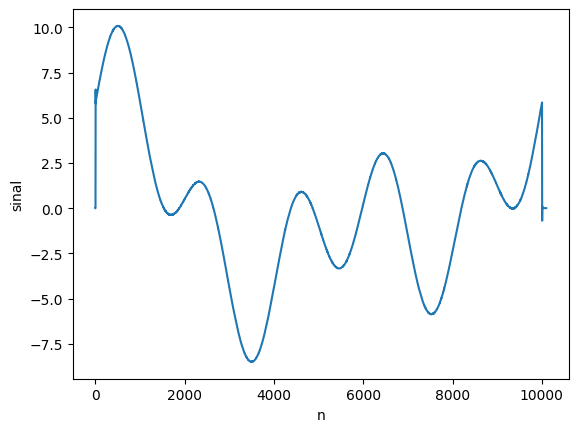

In [61]:
sinal = sp.io.loadmat(r'C:\Users\Usuário\Desktop\Escritório\Disciplinas\SSTD\Projeto-1\data_projeto1.mat')['sinal'].ravel()

resposta = convolucao(hn, sinal)

print("Convolução de data_projeto1.mat e h[n] obtida por função")
plt.plot(resposta)
plt.xlabel("n")
plt.ylabel("sinal")
plt.show()

# Questão 3
Considere o seguinte sistema LDIT:
$$ y\left[n+2\right] -2~\cos \left( \frac{\pi}{8} \right) y\left[n+1\right] + y\left[n\right] = x\left[n\right] $$

## Questão 3a (1 ponto)
Determine a resposta ao impulso h[n] analiticamente. Você pode inserir a sua resposta escaneada como uma imagem abaixo.

In [62]:
### Código da questão 3a

## Questão 3b (1 ponto)
Escreva um programa para obter a resposta ao impulso h[n] iterativamente. Compare a resposta obtida com a resposta analítica, plotando o gráfico das duas respostas para as primeiras 100 amostras. Calcule também o erro médio quadrático entre os dois sinais.

In [63]:
### Código da questão 3b